<a href="https://colab.research.google.com/github/drgarimajain/oc/blob/main/OC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as matlib
import seaborn as sns
import sklearn as skl

In [51]:
oc = pd.read_excel('/content/drive/MyDrive/OC.xlsx')
print (oc.columns.tolist())
print (oc.head())

['patient_id', 'Age', 'Sex', 'ECOG PS', 'Smoking PY', 'Smoking Status', 'Ds Site', 'Subsite', 'T', 'N', 'M ', 'Stage', 'Path', 'HPV', 'Tx Modality', 'Chemo? ', 'Dose', 'Fx', 'Outcome', 'Length FU', 'Cause of Death', 'Local', 'Regional', 'Distant']
     patient_id   Age     Sex ECOG PS  Smoking PY Smoking Status     Ds Site  \
0  RADCURE-0005  62.6  Female  ECOG 0        50.0      Ex-smoker  Oropharynx   
1  RADCURE-0006  87.3    Male  ECOG 2        25.0      Ex-smoker      Larynx   
2  RADCURE-0007  49.9    Male  ECOG 1        15.0      Ex-smoker  Oropharynx   
3  RADCURE-0009  72.3    Male  ECOG 1        30.0      Ex-smoker     Unknown   
4  RADCURE-0010  59.7  Female  ECOG 0         0.0     Non-smoker  Oropharynx   

           Subsite    T    N  ... Tx Modality Chemo?   Dose  Fx Outcome  \
0        post wall  T4b  N2c  ...    RT alone    none  60.0  25    Dead   
1          Glottis  T1b   N0  ...    RT alone    none  51.0  20    Dead   
2           Tonsil   T3  N2b  ...    RT alone 

In [52]:
oc.drop_duplicates

<bound method DataFrame.drop_duplicates of         patient_id   Age     Sex ECOG PS  Smoking PY Smoking Status  \
0     RADCURE-0005  62.6  Female  ECOG 0        50.0      Ex-smoker   
1     RADCURE-0006  87.3    Male  ECOG 2        25.0      Ex-smoker   
2     RADCURE-0007  49.9    Male  ECOG 1        15.0      Ex-smoker   
3     RADCURE-0009  72.3    Male  ECOG 1        30.0      Ex-smoker   
4     RADCURE-0010  59.7  Female  ECOG 0         0.0     Non-smoker   
...            ...   ...     ...     ...         ...            ...   
3341  RADCURE-4126  58.3    Male  ECOG 0        50.0      Ex-smoker   
3342  RADCURE-4127  52.4  Female  ECOG 0        30.0        Current   
3343  RADCURE-4128  71.3    Male  ECOG 1        50.0      Ex-smoker   
3344  RADCURE-4129  53.9  Female  ECOG 0         5.0        Current   
3345  RADCURE-4130  85.5    Male  ECOG 2        15.0      Ex-smoker   

         Ds Site          Subsite    T    N  ... Tx Modality Chemo?   Dose  \
0     Oropharynx        post wall  T4b  N2c  ...    RT alone    none  60.0   
1         Larynx          Glottis  T1b   N0  ...    RT alone    none  51.0   
2     Oropharynx           Tonsil   T3  N2b  ...    RT alone    none  64.0   
3        Unknown              NaN   T0  N2c  ...    RT alone    none  70.0   
4     Oropharynx  Tonsillar Fossa  T4b   N0  ...    RT alone    none  64.0   
...          ...              ...  ...  ...  ...         ...     ...   ...   
3341  Oropharynx    Tonsil Pillar   T2   N0  ...    RT alone    none  70.0   
3342  Oropharynx   Base of Tongue   T2  N2b  ...     ChemoRT     Yes  70.0   
3343  Oropharynx      Soft Palate   T2   N0  ...    RT alone    none  70.0   
3344  Oropharynx  Tonsillar Fossa   T2  N2b  ...     ChemoRT     Yes  70.0   
3345        Skin             Nose   T2   N0  ...    RT alone    none  70.0   

      Fx Outcome Length FU  Cause of Death  Local Regional  Distant  
0     25    Dead  1.317808     Other Cause     No       No       No  
1     20    Dead  1.520548     Other Cause     No       No       No  
2     40   Alive  2.126027             NaN     No       No       No  
3     35   Alive  5.791781             NaN     No       No       No  
4     40   Alive  9.512329             NaN     No       No       No  
...   ..     ...       ...             ...    ...      ...      ...  
3341  35    Dead  8.189041    Other Cancer     No       No       No  
3342  35   Alive  5.739726             NaN     No       No       No  
3343  35   Alive  5.824658             NaN     No       No       No  
3344  35    Dead  0.912329     Other Cause    Yes       No       No  
3345  35    Dead  1.523288     Other Cause     No       No       No  

[3346 rows x 24 columns]>

In [53]:
column_name = oc.columns
print (oc.columns)

Index(['patient_id', 'Age', 'Sex', 'ECOG PS', 'Smoking PY', 'Smoking Status',
       'Ds Site', 'Subsite', 'T', 'N', 'M ', 'Stage', 'Path', 'HPV',
       'Tx Modality', 'Chemo? ', 'Dose', 'Fx', 'Outcome', 'Length FU',
       'Cause of Death', 'Local', 'Regional', 'Distant'],
      dtype='object')


In [54]:
oc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3346 entries, 0 to 3345
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      3346 non-null   object 
 1   Age             3346 non-null   float64
 2   Sex             3346 non-null   object 
 3   ECOG PS         3345 non-null   object 
 4   Smoking PY      3296 non-null   float64
 5   Smoking Status  3346 non-null   object 
 6   Ds Site         3346 non-null   object 
 7   Subsite         2972 non-null   object 
 8   T               3334 non-null   object 
 9   N               3333 non-null   object 
 10  M               3332 non-null   object 
 11  Stage           3319 non-null   object 
 12  Path            3346 non-null   object 
 13  HPV             1717 non-null   object 
 14  Tx Modality     3346 non-null   object 
 15  Chemo?          3346 non-null   object 
 16  Dose            3346 non-null   float64
 17  Fx              3346 non-null   i

In [55]:
oc.describe()

,Age,Smoking PY,Dose,Fx,Length FU
count,3346.000000,3296.000000,3346.000000,3346.000000,3346.000000
mean,62.300418,24.967567,66.658240,33.024806,4.136047
std,11.645892,24.219463,5.754948,5.206841,2.734757
min,15.600000,0.000000,50.000000,20.000000,0.156164
25%,54.500000,0.000000,64.000000,35.000000,1.879452
50%,62.100000,20.000000,70.000000,35.000000,3.663014
75%,70.300000,40.000000,70.000000,35.000000,5.791781
max,90.000000,240.000000,74.000000,60.000000,12.909589


In [56]:
cause_death_counts = oc['Cause of Death'].value_counts()
print (cause_death_counts)

Cause of Death
Index Cancer                506
Other Cause                 308
Other Cancer                162
Unknown                      60
Other cause - Tx related     13
Index Ca-On Tx                2
Index Ca-Sx complication      1
Name: count, dtype: int64


In [57]:
outcome_counts = oc['Outcome'].value_counts()
print(outcome_counts)

Outcome
Alive    2288
Dead     1058
Name: count, dtype: int64


In [58]:
num_ftrs = oc.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_ftrs = oc.select_dtypes(include=['object', 'category']).columns.tolist()
print(num_ftrs)
print(cat_ftrs)

['Age', 'Smoking PY', 'Dose', 'Fx', 'Length FU']
['patient_id', 'Sex', 'ECOG PS', 'Smoking Status', 'Ds Site', 'Subsite', 'T', 'N', 'M ', 'Stage', 'Path', 'HPV', 'Tx Modality', 'Chemo? ', 'Outcome', 'Cause of Death', 'Local', 'Regional', 'Distant']


In [59]:
num_data = oc[num_ftrs]
cat_data = oc[cat_ftrs]
print(cat_data)

        patient_id     Sex ECOG PS Smoking Status     Ds Site  \
0     RADCURE-0005  Female  ECOG 0      Ex-smoker  Oropharynx   
1     RADCURE-0006    Male  ECOG 2      Ex-smoker      Larynx   
2     RADCURE-0007    Male  ECOG 1      Ex-smoker  Oropharynx   
3     RADCURE-0009    Male  ECOG 1      Ex-smoker     Unknown   
4     RADCURE-0010  Female  ECOG 0     Non-smoker  Oropharynx   
...            ...     ...     ...            ...         ...   
3341  RADCURE-4126    Male  ECOG 0      Ex-smoker  Oropharynx   
3342  RADCURE-4127  Female  ECOG 0        Current  Oropharynx   
3343  RADCURE-4128    Male  ECOG 1      Ex-smoker  Oropharynx   
3344  RADCURE-4129  Female  ECOG 0        Current  Oropharynx   
3345  RADCURE-4130    Male  ECOG 2      Ex-smoker        Skin   

              Subsite    T    N  M  Stage                     Path  \
0           post wall  T4b  N2c  M0   IVB  Squamous Cell Carcinoma   
1             Glottis  T1b   N0  M0     I  Squamous Cell Carcinoma   
2        

In [60]:
NAs = pd.concat([num_data.isnull().sum()], axis=1, keys=["num_data"])
NAs[NAs.sum(axis=1)>0]
print(NAs)

            num_data
Age                0
Smoking PY        50
Dose               0
Fx                 0
Length FU          0


In [61]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=50, n_jobs=-1), max_iter=10, tol=1e-3, verbose=2)
imputed_data = imputer.fit_transform(num_data)
imputed_num_data = pd.DataFrame(imputed_data, columns=num_data.columns)

[IterativeImputer] Completing matrix with shape (3346, 5)
[IterativeImputer] Ending imputation round 1/10, elapsed time 2.84
[IterativeImputer] Change: 32.632433252427184, scaled tolerance: 0.24 
[IterativeImputer] Ending imputation round 2/10, elapsed time 5.05
[IterativeImputer] Change: 17.9, scaled tolerance: 0.24 
[IterativeImputer] Ending imputation round 3/10, elapsed time 8.00
[IterativeImputer] Change: 16.799999999999997, scaled tolerance: 0.24 
[IterativeImputer] Ending imputation round 4/10, elapsed time 11.12
[IterativeImputer] Change: 9.56, scaled tolerance: 0.24 
[IterativeImputer] Ending imputation round 5/10, elapsed time 14.09
[IterativeImputer] Change: 10.23, scaled tolerance: 0.24 
[IterativeImputer] Ending imputation round 6/10, elapsed time 18.59
[IterativeImputer] Change: 12.459999999999997, scaled tolerance: 0.24 
[IterativeImputer] Ending imputation round 7/10, elapsed time 22.39
[IterativeImputer] Change: 11.149999999999999, scaled tolerance: 0.24 
[IterativeImp

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [62]:
NAs = pd.concat([imputed_num_data.isnull().sum()], axis=1, keys=["num_data"])
NAs[NAs.sum(axis=1)>0]
print(NAs)

            num_data
Age                0
Smoking PY         0
Dose               0
Fx                 0
Length FU          0


In [63]:
columns_to_encode = ['Sex', 'ECOG PS', 'Smoking Status', 'Ds Site', 'Subsite', 'T', 'N', 'M ', 'Stage', 'Path', 'HPV', 'Tx Modality', 'Chemo? ', 'Outcome', 'Cause of Death', 'Local', 'Regional', 'Distant']
from sklearn.preprocessing import LabelEncoder
for column in columns_to_encode:
    le = LabelEncoder()
    cat_data.loc[:, column] = le.fit_transform(cat_data[column].astype(str))
print(cat_data)
print(cat_data.head())

        patient_id Sex ECOG PS Smoking Status Ds Site Subsite   T  N M  Stage  \
0     RADCURE-0005   0       0              1       8      60  13  5  0    11   
1     RADCURE-0006   1       3              1       3      11   4  0  0     1   
2     RADCURE-0007   1       2              1       8      40   9  4  0    10   
3     RADCURE-0009   1       2              1      15      57   0  5  0    10   
4     RADCURE-0010   0       0              2       8      42  13  0  0    11   
...            ...  ..     ...            ...     ...     ...  .. .. ..   ...   
3341  RADCURE-4126   1       0              1       8      41   5  0  0     3   
3342  RADCURE-4127   0       0              0       8       1   5  4  0    10   
3343  RADCURE-4128   1       2              1       8      34   5  0  0     3   
3344  RADCURE-4129   0       0              0       8      42   5  4  0    10   
3345  RADCURE-4130   1       3              1      14      24   5  0  0     3   

     Path HPV Tx Modality C

In [64]:
cat_data.info

<bound method DataFrame.info of         patient_id Sex ECOG PS Smoking Status Ds Site Subsite   T  N M  Stage  \
0     RADCURE-0005   0       0              1       8      60  13  5  0    11   
1     RADCURE-0006   1       3              1       3      11   4  0  0     1   
2     RADCURE-0007   1       2              1       8      40   9  4  0    10   
3     RADCURE-0009   1       2              1      15      57   0  5  0    10   
4     RADCURE-0010   0       0              2       8      42  13  0  0    11   
...            ...  ..     ...            ...     ...     ...  .. .. ..   ...   
3341  RADCURE-4126   1       0              1       8      41   5  0  0     3   
3342  RADCURE-4127   0       0              0       8       1   5  4  0    10   
3343  RADCURE-4128   1       2              1       8      34   5  0  0     3   
3344  RADCURE-4129   0       0              0       8      42   5  4  0    10   
3345  RADCURE-4130   1       3              1      14      24   5  0  0     3   

     Path HPV Tx Modality Chemo?  Outcome Cause of Death Local Regional  \
0      33   0           4       1       1              4     0        0   
1      33   2           4       1       1              4     0        0   
2      33   1           4       1       0              7     0        0   
3      33   2           4       1       0              7     0        0   
4      33   0           4       1       0              7     0        0   
...   ...  ..         ...     ...     ...            ...   ...      ...   
3341   33   1           4       1       1              3     0        0   
3342   33   1           0       0       0              7     0        0   
3343   33   2           4       1       0              7     0        0   
3344   33   1           0       0       1              4     3        0   
3345   31   2           4       1       1              4     0        0   

     Distant  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
3341       0  
3342       0  
3343       0  
3344       0  
3345       0  

[3346 rows x 19 columns]>

In [65]:
merged_oc = pd.concat([imputed_num_data, cat_data], axis=1)
merged_oc = merged_oc.drop(['Cause of Death', 'patient_id'], axis=1)
corr_matrix0 = merged_oc.corr()
print(corr_matrix0)

                     Age  Smoking PY      Dose        Fx  Length FU       Sex  \
Age             1.000000    0.245769 -0.242372 -0.225046  -0.207884  0.007501   
Smoking PY      0.245769    1.000000 -0.135612 -0.086680  -0.152411  0.093272   
Dose           -0.242372   -0.135612  1.000000  0.824656   0.009431  0.016235   
Fx             -0.225046   -0.086680  0.824656  1.000000  -0.007194  0.040955   
Length FU      -0.207884   -0.152411  0.009431 -0.007194   1.000000 -0.008158   
Sex             0.007501    0.093272  0.016235  0.040955  -0.008158  1.000000   
ECOG PS         0.171510    0.170279 -0.033176  0.011182  -0.198888 -0.029798   
Smoking Status -0.052871   -0.619837  0.042314 -0.000186   0.140324 -0.105695   
Ds Site        -0.150121   -0.179993  0.226344  0.168039   0.052490 -0.061108   
Subsite        -0.178645   -0.054100  0.220529  0.174185   0.097783 -0.091439   
T               0.030401    0.058348  0.111212  0.181591  -0.116886 -0.048197   
N              -0.199260   -

In [66]:
print(num_data.index.equals(cat_data.index))
overlap_cols = num_data.columns.intersection(cat_data.columns)
print("Overlapping columns:", overlap_cols)

True
Overlapping columns: Index([], dtype='object')


In [67]:
print (merged_oc.head())

    Age  Smoking PY  Dose    Fx  Length FU Sex ECOG PS Smoking Status Ds Site  \
0  62.6        50.0  60.0  25.0   1.317808   0       0              1       8   
1  87.3        25.0  51.0  20.0   1.520548   1       3              1       3   
2  49.9        15.0  64.0  40.0   2.126027   1       2              1       8   
3  72.3        30.0  70.0  35.0   5.791781   1       2              1      15   
4  59.7         0.0  64.0  40.0   9.512329   0       0              2       8   

  Subsite  ... M  Stage Path HPV Tx Modality Chemo?  Outcome Local Regional  \
0      60  ...  0    11   33   0           4       1       1     0        0   
1      11  ...  0     1   33   2           4       1       1     0        0   
2      40  ...  0    10   33   1           4       1       0     0        0   
3      57  ...  0    10   33   2           4       1       0     0        0   
4      42  ...  0    11   33   0           4       1       0     0        0   

  Distant  
0       0  
1       0  
2 

In [68]:
print('Outcome' in cat_data.columns)
print ('Outcome' in merged_oc.columns)

True
True


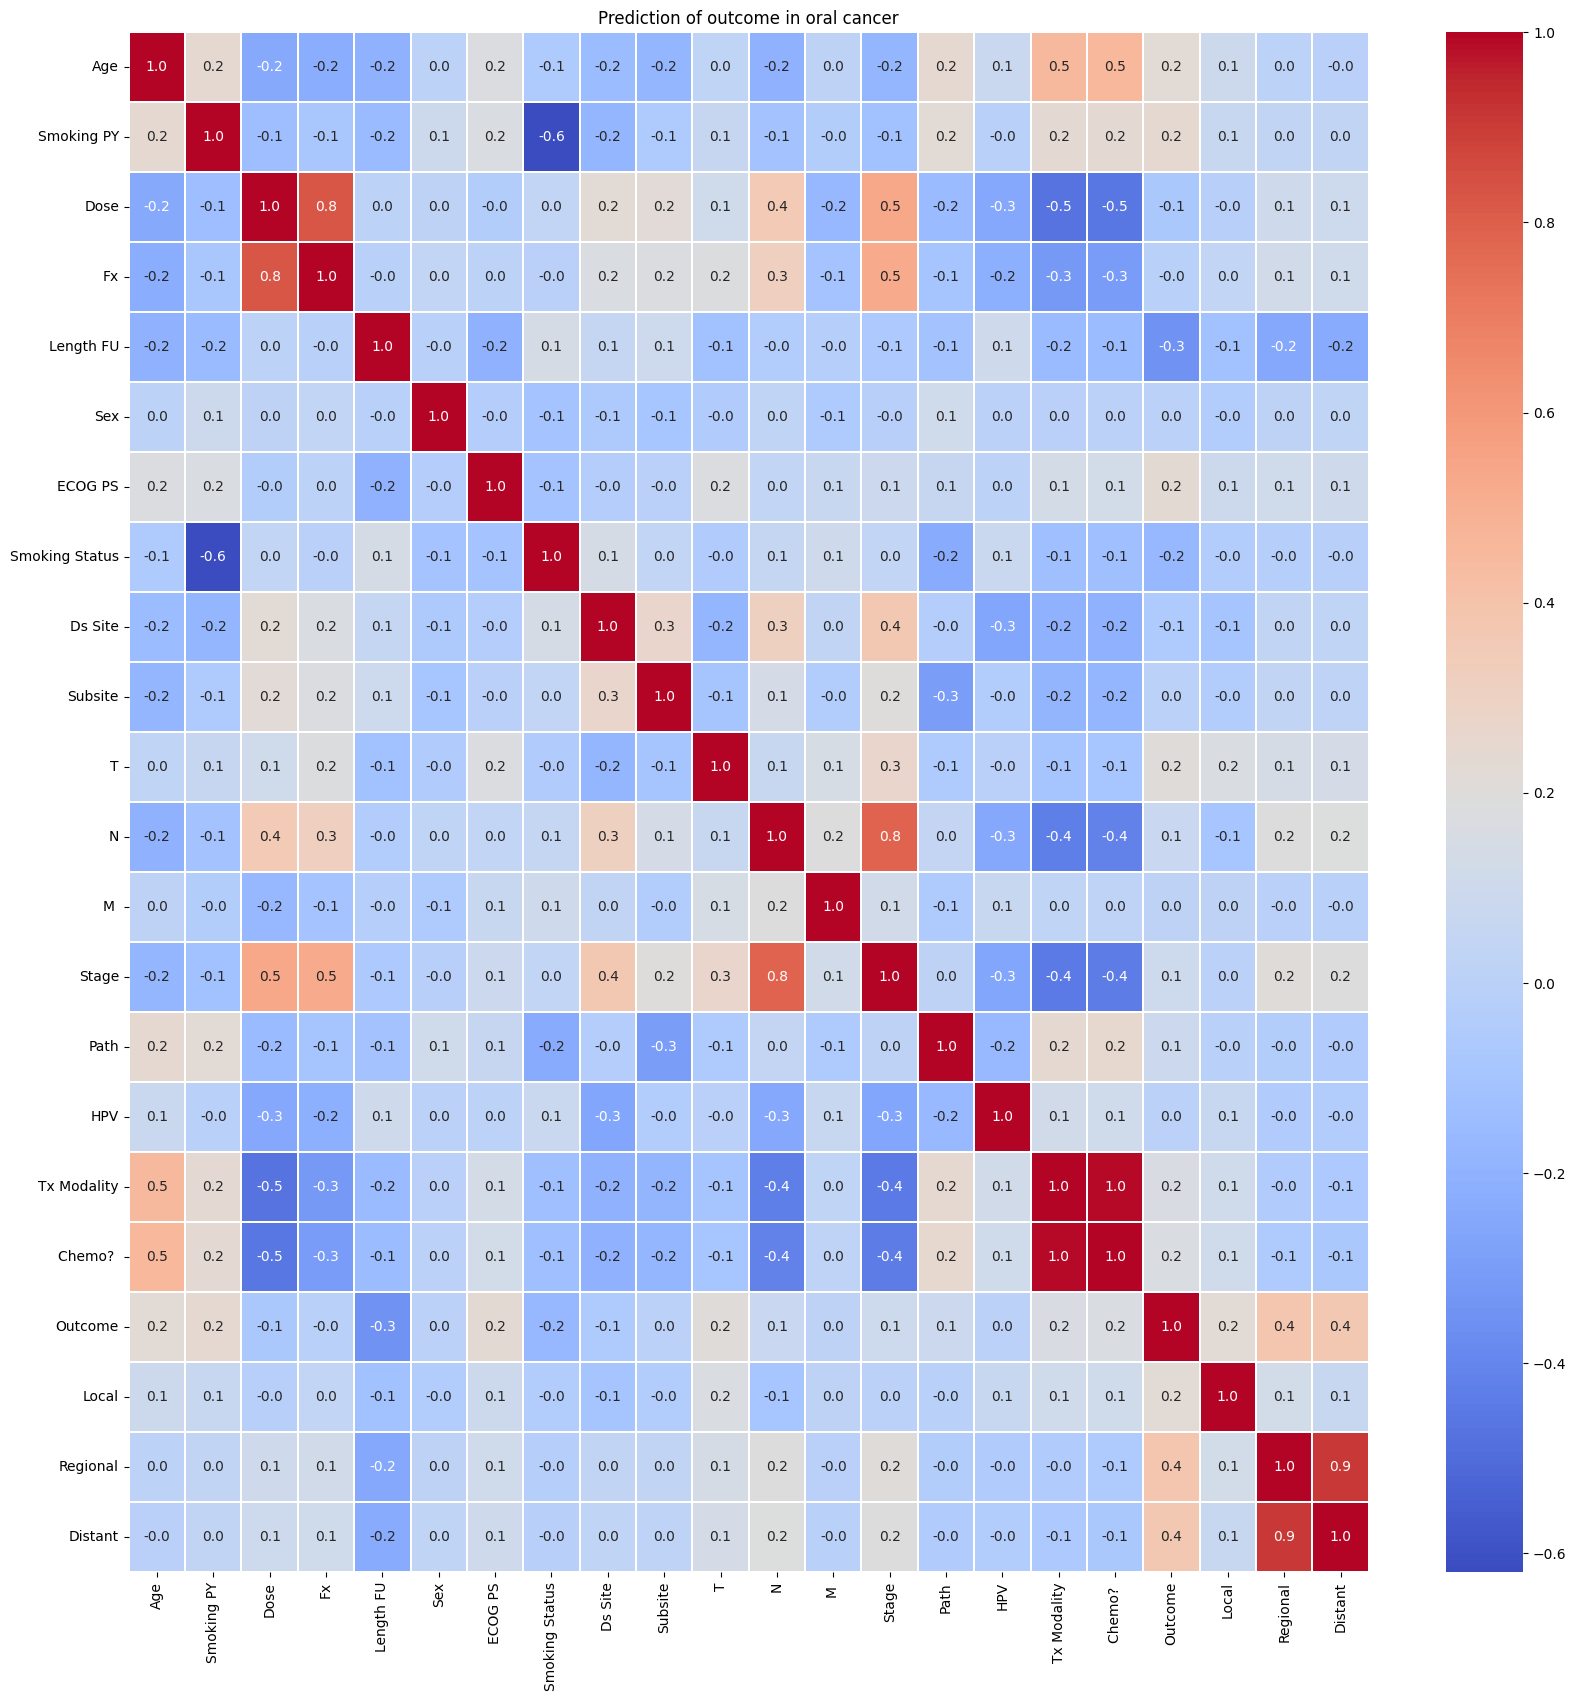

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix0, annot=True, cmap='coolwarm', linewidths=0.1, fmt=".01f")
plt.title('Prediction of outcome in oral cancer')
plt.show()

In [70]:
X = merged_oc.drop('Outcome', axis=1)
y = merged_oc['Outcome']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print("Transformed y:", y[:5])

Transformed y: [1 1 0 0 0]


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
clf = RandomForestClassifier(random_state=25)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7776119402985074
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       447
           1       0.68      0.63      0.65       223

    accuracy                           0.78       670
   macro avg       0.75      0.74      0.74       670
weighted avg       0.77      0.78      0.78       670



In [74]:
probabilities = clf.predict_proba(X_test)

probs_alive = probabilities[:, 1]



In [75]:
from sklearn.metrics import roc_auc_score
probabilities = clf.predict_proba(X_test)
probs_alive = probabilities[:, 1]
roc_auc = roc_auc_score(y_test, probs_alive)
print(f"ROC-AUC Score: {roc_auc}")
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

ROC-AUC Score: 0.8384396223954415
Accuracy: 0.7776119402985074


In [76]:
import joblib
import streamlit as smlt
import pickle
from sklearn.ensemble import RandomForestRegressor
import joblib
joblib.dump(clf, 'random_forest_model.pkl')
loaded_model = joblib.load('random_forest_model.pkl')
model = RandomForestRegressor()
model.fit(X_train, y_train)
model_path = 'best_rf_model.pkl'
joblib.dump(model, model_path)
model_path = 'best_rf_model.pkl'
model = joblib.load(model_path)
smlt.title('Prognosis in Head & Neck squamous cell carcinomas')

import streamlit as st

st.title('Patient Data Input Form')


with st.form(key='patient_form'):
    age = st.number_input('Age', min_value=0, max_value=120, value=30, step=1)
    sex = st.radio('Sex', options=['Male', 'Female', 'Other'])
    smoking_status = st.checkbox('Smoker')
    Disease_Site = st.selectbox('Site', options=['Subsite A', 'Subsite B', 'Subsite C'])
    stage = st.selectbox('Stage', options=['0', 'I', 'IA', 'IB', 'IC', '2A', '2B', '2C', '3A', '3B', '3C', '4A', '4B', '4C'])

    # Every form must have a submit button.
    submitted = st.form_submit_button('Submit')
    if submitted:
        st.write('Patient Data Submitted Successfully!')
        st.write(f"Age: {age}, Sex: {sex}, Smoking Status: {smoking_status}, Subsite: {subsite}, Stage: {stage}")

if st.button('Predict Probability of poor Overasll survival'):
    prediction = model.predict(features)
    st.write(f'The predicted probability of poor Overasll survival is: {prediction[0]}')

